<a href="https://colab.research.google.com/github/kritika200015/AV-Job-A-Thon-May2021/blob/main/Credit_Card_Customer_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

JOB-A-THON MAY 2021


So, this was a problem statement in Analytics Vidhya Job-a-thon of may 2021. I am not a part of this competition but I still want to explore the problem statement and challenge.



Problem statement - Credit Card Lead Prediction

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like telecasting, e-mails, recommendations on net banking, mobile banking, etc.

In this case, the Happy Customer Bank wants to cross-sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

This dataset was part of May 2021 Jobathon conducted my analytics vidhya, for more info check:https://datahack.analyticsvidhya.com/contest/job-a-thon-2/

Importing Lib


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
train = pd.read_csv("train_s3TEQDk.csv")

In [ ]:
train.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


Preprocessing and Visualization

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [ ]:
for i in train.columns:
   print("\nColumn Name:",i,"-->",train[i].unique(),"-->Unique Count",len(train[i].unique()))


Column Name: ID --> ['NNVBBKZB' 'IDD62UNG' 'HD3DSEMC' ... 'GEHAUCWT' 'GE7V8SAH' 'BOCZSWLJ'] -->Unique Count 245725

Column Name: Gender --> ['Female' 'Male'] -->Unique Count 2

Column Name: Age --> [73 30 56 34 62 48 40 55 53 27 31 79 33 46 59 65 37 44 32 50 70 25 52 26
 67 29 41 49 63 61 64 60 76 57 36 28 58 43 35 71 82 45 42 54 47 78 51 68
 83 39 84 24 38 74 81 69 75 85 66 80 72 77 23] -->Unique Count 63

Column Name: Region_Code --> ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271'] -->Unique Count 35

Column Name: Occupation --> ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur'] -->Unique Count 4

Column Name: Channel_Code --> ['X3' 'X1' 'X2' 'X4'] -->Unique Count 4

Column Name: Vintage --> [ 43  32  26  19  33  20  13  38  49 123  14  31  57  69  9

In [ ]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [ ]:
cat_col = []
for x in train.dtypes.index:
    if train.dtypes[x] == "object":
        cat_col.append(x)
        
cat_col

['ID',
 'Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']

In [ ]:
for col in cat_col:
  print(col)
  print(train[col].value_counts())
  print()

ID
5OCC5AYX    1
QTD5VQQ7    1
VO59SIPJ    1
F7MMUKPA    1
FFUMXXPB    1
           ..
SFM43EPE    1
SRHO5J76    1
JWABVAEL    1
MTJXY9NY    1
8RIKRTEW    1
Name: ID, Length: 245725, dtype: int64

Gender
Male      134197
Female    111528
Name: Gender, dtype: int64

Region_Code
RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

Occupation
Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

Channel_Code
X1    103718

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

ep = train['Gender'].value_counts().reset_index()
ep.columns = [
    'Gender', 
    'percent'
]
ep['percent'] /= len(train)

fig = px.pie(
    ep, 
    names='Gender', 
    values='percent', 
    title='Countplot of Gender', 
    width=800,
    height=500 
)


In [ ]:
fig.show()

In [ ]:
fig = px.pie(train['Occupation'].value_counts(), values='Occupation', 
             names = train['Occupation'].value_counts().index,title = 'Occupation',template='ggplot2')
fig.show()

In [ ]:
fig = px.pie(train['Channel_Code'].value_counts(), values='Channel_Code', 
             names = train['Channel_Code'].value_counts().index,title = 'Channel_Code',template='ggplot2')
fig.show()

In [ ]:
fig = px.pie(train['Credit_Product'].value_counts(), values='Credit_Product', 
             names = train['Credit_Product'].value_counts().index,title = 'Credit_Product',template='ggplot2')
fig.show()

In [ ]:
fig = px.pie(train['Is_Active'].value_counts(), values='Is_Active', 
             names = train['Is_Active'].value_counts().index,title = 'Is_Active',template='ggplot2')
fig.show()

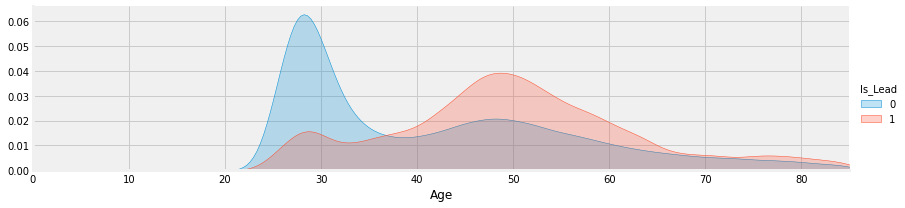

In [ ]:
facet = sns.FacetGrid(train,hue='Is_Lead',aspect = 4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.show()

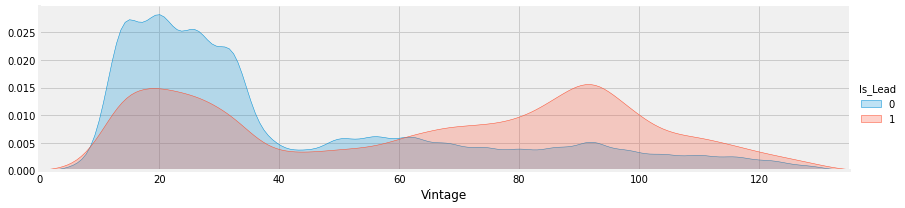

In [ ]:
facet = sns.FacetGrid(train,hue='Is_Lead',aspect = 4)
facet.map(sns.kdeplot,'Vintage',shade=True)
facet.set(xlim=(0,train['Vintage'].max()))
facet.add_legend()
plt.show()

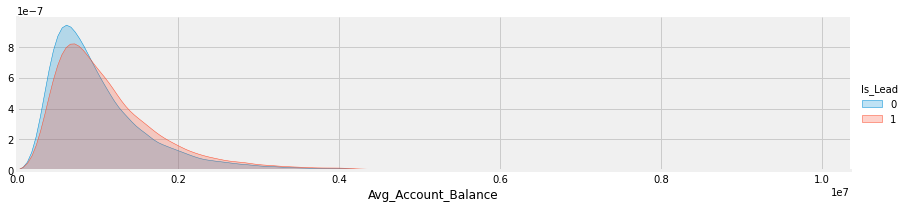

In [ ]:
facet = sns.FacetGrid(train,hue='Is_Lead',aspect = 4)
facet.map(sns.kdeplot,'Avg_Account_Balance',shade=True)
facet.set(xlim=(0,train['Avg_Account_Balance'].max()))
facet.add_legend()
plt.show()

In [ ]:
train['Gender'] = train['Gender'].map({'Male':int(0), 'Female':int(1)})

In [ ]:
train['Occupation'] = train['Occupation'].map({'Other' : int(0), 'Salaried':int(1) ,'Self_Employed':int(2) ,  'Entrepreneur': int(3)})

In [ ]:
train['Channel_Code'] = train['Channel_Code'].map({'X1':int(0) , 'X2': int(1), 'X3' : int(2) , 'X4' : int(3)})

In [ ]:
train['Is_Active'] = train['Is_Active'].map({'Yes':int(0), 'No':int(1)})

In [ ]:
train['Credit_Product'] = train['Credit_Product'].map({'Yes' : int(0) , 'No': int(1)})

In [ ]:
test = pd.read_csv('test_mSzZ8RL.csv')

In [ ]:
test.shape

(105312, 10)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
labels = {}
for col in train.select_dtypes(exclude = np.number).columns.tolist():
    le = LabelEncoder().fit(pd.concat([train[col].astype(str),test[col].astype(str)]))   
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))
    labels [col] = le
print('Categorical columns:', list(labels.keys()))

Categorical columns: ['ID', 'Region_Code']


In [ ]:
print(f'Percent of Nans in Train Data : {round(train.isna().sum().sum()/len(train), 2)}')
print(f'Percent of Nans in Test  Data : {round(test.isna().sum().sum()/len(test), 2)}')

Percent of Nans in Train Data : 0.12
Percent of Nans in Test  Data : 0.12


In [ ]:
train.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

Imputing Missing data with MICE Imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer()

In [ ]:
train['Credit_Product'] = mice_imputer.fit_transform(train[['Credit_Product']])
train['Credit_Product'] = round(train['Credit_Product'])

In [ ]:
train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [ ]:
test['Gender'] = test['Gender'].map({'Male':int(0), 'Female':int(1)})

In [ ]:
test['Occupation'] = test['Occupation'].map({'Other' : int(0), 'Salaried':int(1) ,'Self_Employed':int(2) ,  'Entrepreneur': int(3)})

In [ ]:
test['Channel_Code'] = test['Channel_Code'].map({'X1':int(0) , 'X2': int(1), 'X3' : int(2) , 'X4' : int(3)})

In [ ]:
test['Is_Active'] = test['Is_Active'].map({'Yes':int(0), 'No':int(1)})

In [ ]:
test['Credit_Product'] = test['Credit_Product'].map({'Yes' : int(0) , 'No': int(1)})

In [ ]:
test['Credit_Product'] = mice_imputer.fit_transform(test[['Credit_Product']])
test['Credit_Product'] = round(test['Credit_Product'])

In [ ]:
test.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

Training & Testing data

In [ ]:
train = train.drop(columns=['Age' , 'Region_Code'],
                 axis=1)
train = train.dropna(how='any')
print(train.shape)

(245725, 9)


In [ ]:
Features = ['ID', 'Age', 'Region_Code','Gender','Occupation','Channel_Code','Vintage','Credit_Product','Avg_Account_Balance', 'Is_Active']
Target = ['Is_Lead']

In [ ]:
from sklearn.model_selection import train_test_split
Y = train['Is_Lead']
X = train.drop(columns = ['Is_Lead'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=9)

print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (208866, 8)
Y train shape:  (208866,)
X test shape:  (36859, 8)
Y test shape:  (36859,)


Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ms
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline


from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

plt.style.use('fivethirtyeight')

from plotly.offline import download_plotlyjs,init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
rf_pipe = Pipeline(steps =[ ('std_scale',StandardScaler()), ("RF",RandomForestClassifier(random_state=0,max_depth= 10, max_features= 5,min_samples_leaf= 30, min_samples_split= 100, n_estimators= 500))])
rf_pipe.fit(X_train , Y_train)

Pipeline(memory=None,
         steps=[('std_scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RF',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=10, max_features=5,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=30,
                                        min_samples_split=100,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         v

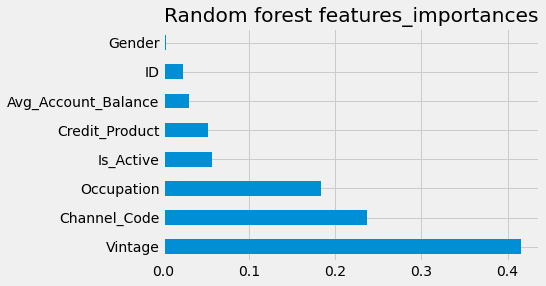

In [ ]:
feature_importances = pd.Series(rf_pipe.steps[1][1].feature_importances_,index =X_train.columns);
feature_importances.nlargest(15).plot(kind='barh');
plt.title('Random forest features_importances');

In [ ]:
rf_train_predict = rf_pipe.predict(X_train)
rf_test_predict = rf_pipe.predict(X_test)



In [ ]:
print('Random Forest classification_report on test_set')
print(classification_report(Y_test,rf_test_predict))

Random Forest classification_report on test_set
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     28137
           1       0.64      0.23      0.34      8722

    accuracy                           0.79     36859
   macro avg       0.72      0.59      0.60     36859
weighted avg       0.76      0.79      0.75     36859



In [ ]:
print('Random Forest classification_report on test_set')
print(classification_report(Y_train,rf_train_predict))

Random Forest classification_report on test_set
              precision    recall  f1-score   support

           0       0.80      0.96      0.88    159300
           1       0.68      0.24      0.36     49566

    accuracy                           0.79    208866
   macro avg       0.74      0.60      0.62    208866
weighted avg       0.77      0.79      0.75    208866



In [ ]:
rf_probs_train = rf_pipe.predict_proba(X_train)
rf_probs_train = rf_probs_train[:, 1]

rf_probs_test = rf_pipe.predict_proba(X_test)
rf_probs_test = rf_probs_test[:, 1]


In [ ]:
auc_RF_train = roc_auc_score(Y_train,rf_probs_train)
auc_RF_test = roc_auc_score(Y_test,rf_probs_test)
print("Random forest auc on train set",auc_RF_train)
print("Random forest auc on test set", auc_RF_test)

Random forest auc on train set 0.7897493050095417
Random forest auc on test set 0.7749488068815065


In [ ]:
predict = rf_pipe.predict_proba(X_test)
predict = predict[:,1]

In [ ]:
model = RandomForestRegressor(bootstrap=False, max_depth=15, max_features='log2',
                      random_state=42)
# We train model
model.fit(train[features],train[target])

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
predictions = model.predict(test[features])

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean, std

cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, train[features], train[target], cv=cv, n_jobs=-1)
print('Mean of Scores: %.3f' % (mean(scores)))

Mean of Scores: 0.181


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, predict)

0.1455362948069429

In [ ]:
test_new = pd.read_csv('test_mSzZ8RL.csv')

Submission File

In [ ]:
submission_rf_new = pd.DataFrame({'ID':test_new['ID'],'Is_Lead':predictions})                        

#Visualize the first 10 rows
submission_rf_new.head(10)

,ID,Is_Lead
0,VBENBARO,0.058963
1,CCMEWNKY,0.163255
2,VK3KGA9M,0.115022
3,TT8RPZVC,0.030478
4,SHQZEYTZ,0.030374
5,MZZAQMPT,0.378069
6,Y88TW36I,0.224742
7,3UGOAQNU,0.064339
8,VVUKMUJT,0.918373
9,9R363ZXS,0.198509


In [ ]:
submission_rf_new['Is_Lead'] = submission_rf_new['Is_Lead'].astype(int)

In [ ]:
filename = 'submission_rf_new.csv'

submission_rf_new.to_csv(filename,index=True)

print('Saved file: ' + filename)

Saved file: submission_rf_new.csv


In [ ]:
submission.shape

(105312, 2)

In [ ]:
submission.head(10)

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
5,MZZAQMPT,0
6,Y88TW36I,0
7,3UGOAQNU,0
8,VVUKMUJT,0
9,9R363ZXS,0
